In [50]:
import pandas as pd
import re

In [52]:
from nltk.corpus import stopwords
import nltk

In [54]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kushshah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
df = pd.read_csv("labelled_success.csv")
df.drop(columns = df.columns[0], inplace = True)

In [58]:
df.head()

,SongID,Performer,Song,Week Position,Weeks on Chart,spotify_genre,spotify_track_id,Lyrics,Hit,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,Hit_2
0,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,6,20,"['album rock', 'bubblegum pop', 'country rock'...",5nBp8F6tekSrnFg8G2Pvug,I was a car hop\rYou were into be-bop\rYou san...,False,0.647,...,0.0,0.0274,0.4320,0.000006,0.1330,0.952,155.697,4.0,40.0,False
1,'Til My Baby Comes HomeLuther Vandross,Luther Vandross,'Til My Baby Comes Home,29,16,"['funk', 'motown', 'neo soul', 'new jack swing...",2R97RZWUx4vAFbMMtmb5Ss,Theres a whole lot of girls\r\nmessin around\r...,False,0.804,...,0.0,0.1830,0.0567,0.000006,0.0253,0.802,139.663,4.0,29.0,False
2,'Til Summer Comes AroundKeith Urban,Keith Urban,'Til Summer Comes Around,58,16,"['australian country', 'contemporary country',...",1CKmI1IQjVEVB3F7VmJmM3,Another long summer's come and gone\r\nI don't...,False,0.570,...,0.0,0.0331,0.5930,0.000136,0.7700,0.308,127.907,4.0,42.0,False
3,'Til You Do Me RightAfter 7,After 7,'Til You Do Me Right,31,22,"['funk', 'neo soul', 'new jack swing', 'quiet ...",3kGMziz884MLV1oCwrarmN,I was in love with you\r\nAnd gave my heart to...,False,0.612,...,1.0,0.0264,0.0781,0.000000,0.0763,0.433,76.744,4.0,42.0,False
4,'TilThe Angels,The Angels,'Til,14,15,"['blues rock', 'garage rock', 'modern blues ro...",6cMBpazQUSw6xYiLNYvQzf,"Due to copyright restrictions, we are not auth...",False,0.253,...,1.0,0.0318,0.8050,0.000180,0.0939,0.307,173.819,3.0,10.0,False


In [60]:
df.isna().sum()

SongID                      0
Performer                   0
Song                        0
Week Position               0
Weeks on Chart              0
spotify_genre               0
spotify_track_id            0
Lyrics                      0
Hit                         0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
time_signature              0
spotify_track_popularity    0
Hit_2                       0
dtype: int64

In [62]:
df.describe()

,Week Position,Weeks on Chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
count,13815.000000,13815.000000,13815.000000,13815.000000,13815.00000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000
mean,40.256098,12.988056,0.594283,0.628038,5.23127,-8.366895,0.732392,0.068463,0.271026,0.020646,0.187360,0.579468,120.789126,3.938762,47.207781
std,29.641944,8.758627,0.149942,0.202024,3.54491,3.562200,0.442728,0.077366,0.273354,0.099119,0.154107,0.238726,28.345595,0.306083,19.484025
min,1.000000,1.000000,0.000000,0.018100,0.00000,-27.119000,0.000000,0.000000,0.000003,0.000000,0.014500,0.000000,0.000000,0.000000,0.000000
25%,13.000000,6.000000,0.497000,0.481000,2.00000,-10.722500,0.000000,0.031700,0.038300,0.000000,0.090850,0.386000,99.072000,4.000000,33.000000
50%,36.000000,12.000000,0.601000,0.647000,5.00000,-7.786000,1.000000,0.039800,0.168000,0.000005,0.128000,0.591000,119.610000,4.000000,49.000000
75%,65.000000,19.000000,0.698000,0.793000,8.00000,-5.592500,1.000000,0.063000,0.454000,0.000372,0.240000,0.778000,137.918000,4.000000,62.000000
max,100.000000,87.000000,0.988000,0.997000,11.00000,-0.463000,1.000000,0.888000,0.990000,0.982000,0.991000,0.991000,233.429000,5.000000,100.000000


In [64]:
# Working on Hit
df.drop(columns="Hit_2", inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13815 entries, 0 to 13814
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SongID                    13815 non-null  object 
 1   Performer                 13815 non-null  object 
 2   Song                      13815 non-null  object 
 3   Week Position             13815 non-null  int64  
 4   Weeks on Chart            13815 non-null  int64  
 5   spotify_genre             13815 non-null  object 
 6   spotify_track_id          13815 non-null  object 
 7   Lyrics                    13815 non-null  object 
 8   Hit                       13815 non-null  bool   
 9   danceability              13815 non-null  float64
 10  energy                    13815 non-null  float64
 11  key                       13815 non-null  float64
 12  loudness                  13815 non-null  float64
 13  mode                      13815 non-null  float64
 14  speech

In [68]:
df.duplicated().sum()

0

In [70]:
df["Hit"].replace(to_replace= {True : 1, False : 0}, inplace = True)

/var/folders/31/89q4lfy92jx4lp6kwytq6lmw0000gn/T/ipykernel_42784/1087353374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hit"].replace(to_replace= {True : 1, False : 0}, inplace = True)
/var/folders/31/89q4lfy92jx4lp6kwytq6lmw0000gn/T/ipykernel_42784/1087353374.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

<h3> Analyzing Data </h3>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Hit'])
plt.title("Hit vs. Non-Hit Song Distribution")
plt.show()

In [ ]:
numerical_cols = ['danceability', 'energy', 'loudness', 'speechiness', 
                  'acousticness', 'instrumentalness', 'valence', 'tempo', 'spotify_track_popularity', "Hit"]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

<h3> We will Only Keep Lyrics as a feature </h3>

In [ ]:
df.columns

In [72]:
relevant_columns = ['SongID', 'Performer', 'Song','Lyrics','Hit']
df = df[relevant_columns]

<h4> Cleaning Lyrics </h4>

In [76]:
def clean_lyrics(text):
    if pd.isnull(text):  
        return ""  # Handle missing values gracefullyf
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove [Chorus], [Verse], etc.
    text = re.sub(r'\(.*?\)', '', text)  # Remove text inside parentheses
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation, numbers, special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces and line breaks
    return text

In [78]:
df['clean_lyrics'] = df['Lyrics'].apply(clean_lyrics)

In [82]:
df.head()

,SongID,Performer,Song,Lyrics,Hit,clean_lyrics
0,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,I was a car hop\rYou were into be-bop\rYou san...,0,i was a car hop you were into bebop you sang d...
1,'Til My Baby Comes HomeLuther Vandross,Luther Vandross,'Til My Baby Comes Home,Theres a whole lot of girls\r\nmessin around\r...,0,theres a whole lot of girls messin around tryi...
2,'Til Summer Comes AroundKeith Urban,Keith Urban,'Til Summer Comes Around,Another long summer's come and gone\r\nI don't...,0,another long summers come and gone i dont know...
3,'Til You Do Me RightAfter 7,After 7,'Til You Do Me Right,I was in love with you\r\nAnd gave my heart to...,0,i was in love with you and gave my heart to yo...
4,'TilThe Angels,The Angels,'Til,"Due to copyright restrictions, we are not auth...",0,due to copyright restrictions we are not autho...


In [84]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kushshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
df['clean_lyrics'] = df['clean_lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [88]:
lemmatizer = WordNetLemmatizer()
df['clean_lyrics'] = df['clean_lyrics'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [ ]:
df.head()

In [92]:
df.to_csv("eda.csv")
# df = pd.read_csv("eda.csv")

In [9]:
df['num_words'] = df['Lyrics'].apply(lambda x: len(x.split()))
df['num_unique_words'] = df['Lyrics'].apply(lambda x: len(set(x.split())))
df['num_chars'] = df['Lyrics'].apply(len)

# Summary statistics
df[['num_words', 'num_unique_words', 'num_chars']].describe()


,num_words,num_unique_words,num_chars
count,13815.000000,13815.000000,13815.000000
mean,278.603330,118.523055,1436.000579
std,150.859497,61.742715,775.581256
min,1.000000,1.000000,1.000000
25%,180.000000,83.000000,932.500000
50%,246.000000,105.000000,1271.000000
75%,335.000000,135.000000,1725.000000
max,2990.000000,732.000000,14322.000000


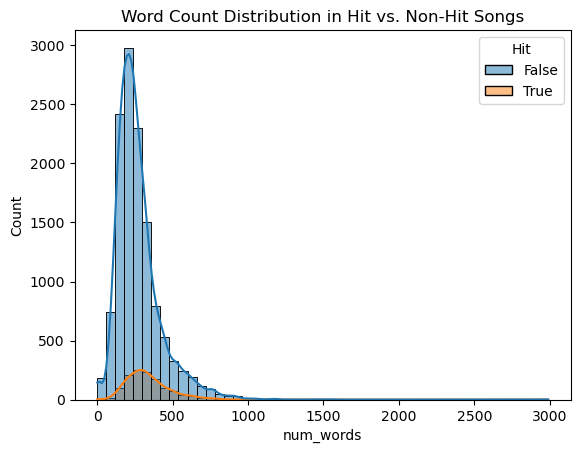

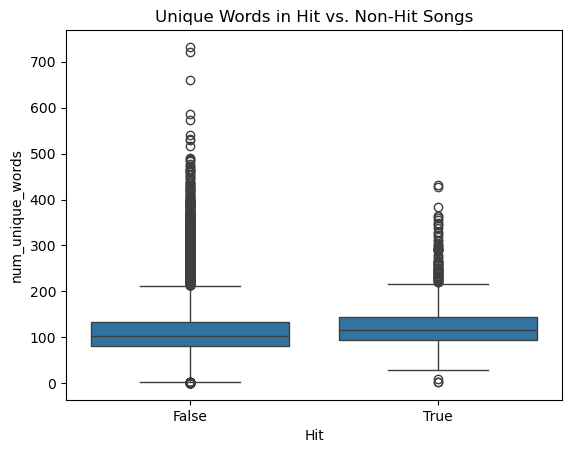

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of word count in hit vs non-hit songs
sns.histplot(data=df, x='num_words', hue='Hit', bins=50, kde=True)
plt.title("Word Count Distribution in Hit vs. Non-Hit Songs")
plt.show()

# Unique words comparison
sns.boxplot(data=df, x='Hit', y='num_unique_words')
plt.title("Unique Words in Hit vs. Non-Hit Songs")
plt.show()

In [15]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 13.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.9 MB/s eta 0:00:0000:01


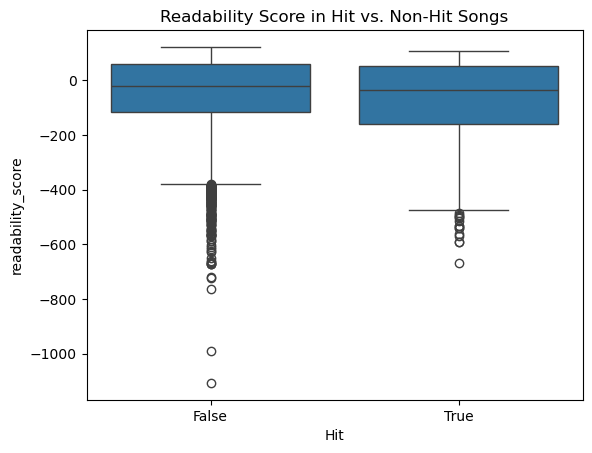

In [17]:
from textstat import flesch_reading_ease

df['readability_score'] = df['Lyrics'].apply(flesch_reading_ease)

# Boxplot of readability scores for hit vs. non-hit songs
sns.boxplot(data=df, x='Hit', y='readability_score')
plt.title("Readability Score in Hit vs. Non-Hit Songs")
plt.show()

In [21]:
!pip install TextBlob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 7.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


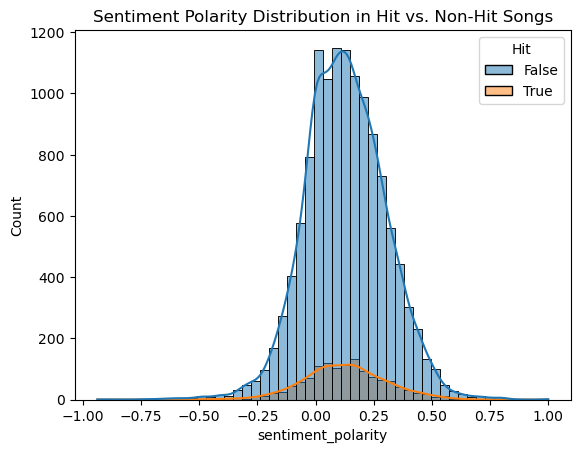

In [23]:
from textblob import TextBlob

df['sentiment_polarity'] = df['Lyrics'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['Lyrics'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Sentiment Polarity Distribution
sns.histplot(df, x='sentiment_polarity', hue='Hit', bins=50, kde=True)
plt.title("Sentiment Polarity Distribution in Hit vs. Non-Hit Songs")
plt.show()

In [27]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 2.5 MB/s eta 0:00:00a 0:00:01


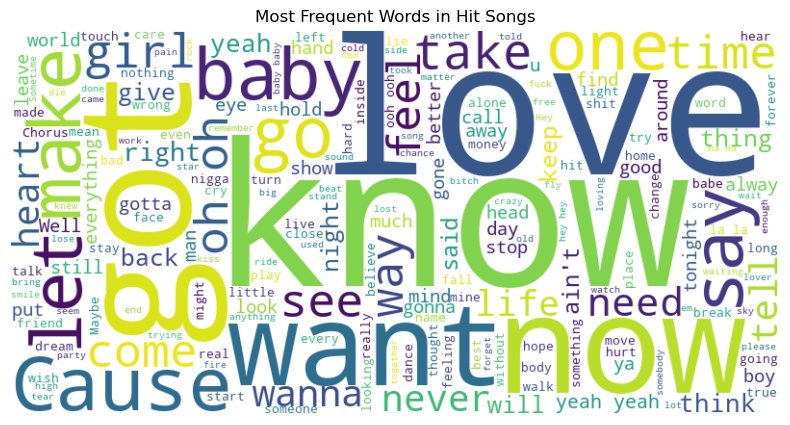

In [29]:
from wordcloud import WordCloud

hit_lyrics = " ".join(df[df['Hit'] == True]['Lyrics'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(hit_lyrics)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Hit Songs")
plt.show()

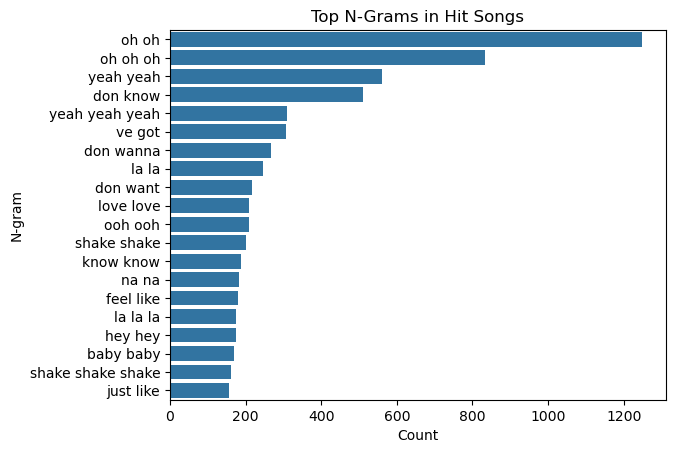

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,3), stop_words='english')
X = vectorizer.fit_transform(df[df['Hit'] == True]['Lyrics'])

# Get top n-grams
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
top_ngrams = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]

# Convert to DataFrame for plotting
ngram_df = pd.DataFrame(top_ngrams, columns=['N-gram', 'Count'])
sns.barplot(y='N-gram', x='Count', data=ngram_df)
plt.title("Top N-Grams in Hit Songs")
plt.show()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Lyrics'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}: ", [words[i] for i in topic.argsort()[-10:]])


Topic 1:  ['dee', 'bum', 'wah', 'nah', 'sha', 'ee', 'dum', 'hallelujah', 'ba', 'da']
Topic 2:  ['wanna', 'oh', 'baby', 'just', 'know', 'ain', 'don', 'got', 'like', 'yeah']
Topic 3:  ['santa', 'invisible', 'merry', 'wo', 'wa', 'bop', 'johnny', 'boogie', 'doo', 'christmas']
Topic 4:  ['time', 'like', 've', 'just', 'baby', 'oh', 'll', 'know', 'don', 'love']
Topic 5:  ['tu', 'el', 'ey', 'mary', 'te', 'mi', 'eh', 'que', 'instrumental', 'la']


<h4> Model Training </h4>

In [44]:
df = pd.read_csv("eda.csv")

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features to avoid excessive dimensionality

# Fit and transform the cleaned lyrics into a TF-IDF matrix
X = vectorizer.fit_transform(df['clean_lyrics'])

# Convert the result to a DataFrame for easier inspection
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Inspect the top 5 rows of the TF-IDF matrix
print(tfidf_df.head())


   aaa  aaah  aah  abandoned  able  aboard  absolutely  abuse  accept  \
0  0.0   0.0  0.0        0.0   0.0     0.0         0.0    0.0     0.0   
1  0.0   0.0  0.0        0.0   0.0     0.0         0.0    0.0     0.0   
2  0.0   0.0  0.0        0.0   0.0     0.0         0.0    0.0     0.0   
3  0.0   0.0  0.0        0.0   0.0     0.0         0.0    0.0     0.0   
4  0.0   0.0  0.0        0.0   0.0     0.0         0.0    0.0     0.0   

   accident  ...  yous  youth     youve  yuh  yummy  yup  zero  zombie  zone  \
0       0.0  ...   0.0    0.0  0.000000  0.0    0.0  0.0   0.0     0.0   0.0   
1       0.0  ...   0.0    0.0  0.000000  0.0    0.0  0.0   0.0     0.0   0.0   
2       0.0  ...   0.0    0.0  0.000000  0.0    0.0  0.0   0.0     0.0   0.0   
3       0.0  ...   0.0    0.0  0.062182  0.0    0.0  0.0   0.0     0.0   0.0   
4       0.0  ...   0.0    0.0  0.000000  0.0    0.0  0.0   0.0     0.0   0.0   

   zoo  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 5000 columns]


In [96]:
y = df['Hit']

In [98]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(X_train.shape, X_test.shape)

(11052, 5000) (2763, 5000)


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9069851610568223
Confusion Matrix:
 [[2506    0]
 [ 257    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      2506
           1       0.00      0.00      0.00       257

    accuracy                           0.91      2763
   macro avg       0.45      0.50      0.48      2763
weighted avg       0.82      0.91      0.86      2763



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
